# Linear Regression
*Prediction for an Ecommerce company based in New York City that sells clothing online and also in-store style and clothing advice sessions should focus their efforts on their mobile app experience or their website. *

In [11]:
# Linear Regression with Python to predict and decide whether an Ecommerce company based in New York City that sells clothing online and also in-store style and clothing advice sessions should focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out!

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd 
import seaborn as sns
%matplotlib inline
from scipy import stats
import numpy as np 
from dfply import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [17]:
Ecom = pd.read_csv("https://raw.githubusercontent.com/lade07/myOpenSet/master/Ecommerce%20Customers")


In [18]:
Ecom.head()


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [19]:
Ecom.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [20]:
Ecom.describe()


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [23]:
Ecom.columns


Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

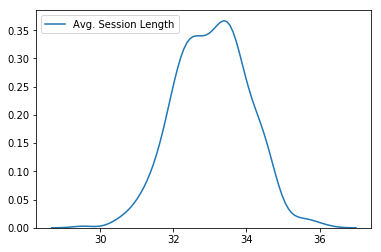

In [24]:
sns.kdeplot(Ecom['Avg. Session Length'])


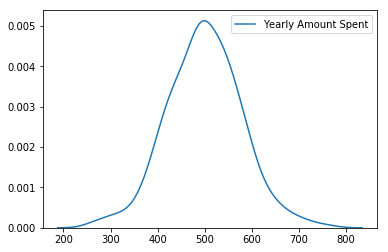

In [25]:
sns.kdeplot(Ecom['Yearly Amount Spent'])


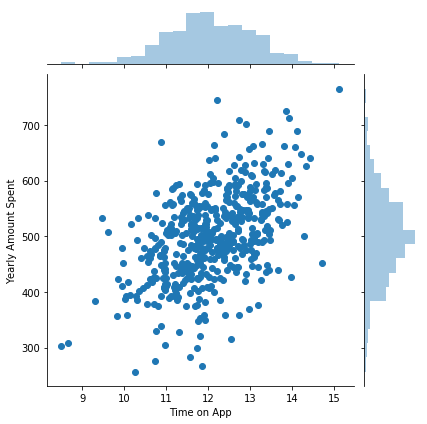

In [26]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=Ecom)


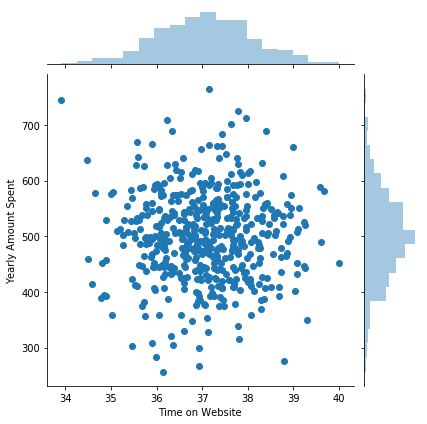

In [31]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=Ecom)


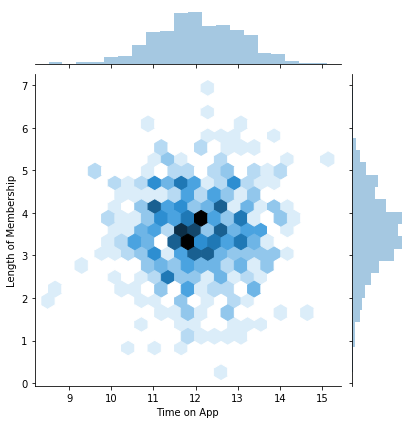

In [32]:
sns.jointplot(x='Time on App',y='Length of Membership',data=Ecom, kind='hex')


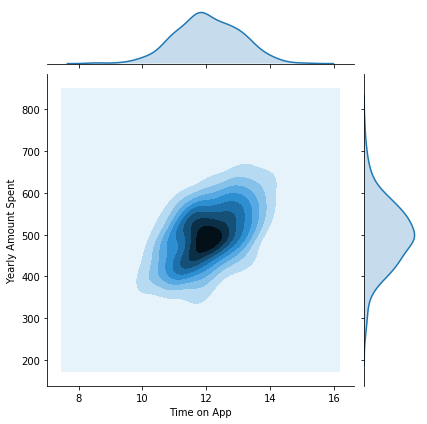

In [33]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=Ecom, kind = 'kde')


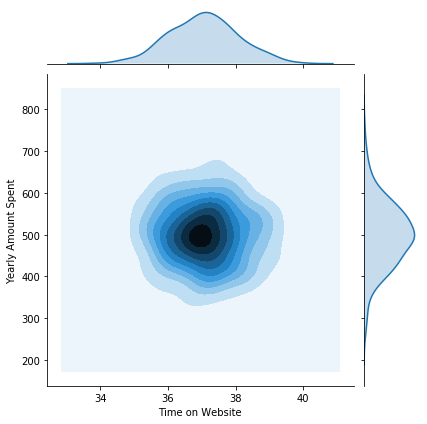

In [34]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=Ecom, kind='kde')


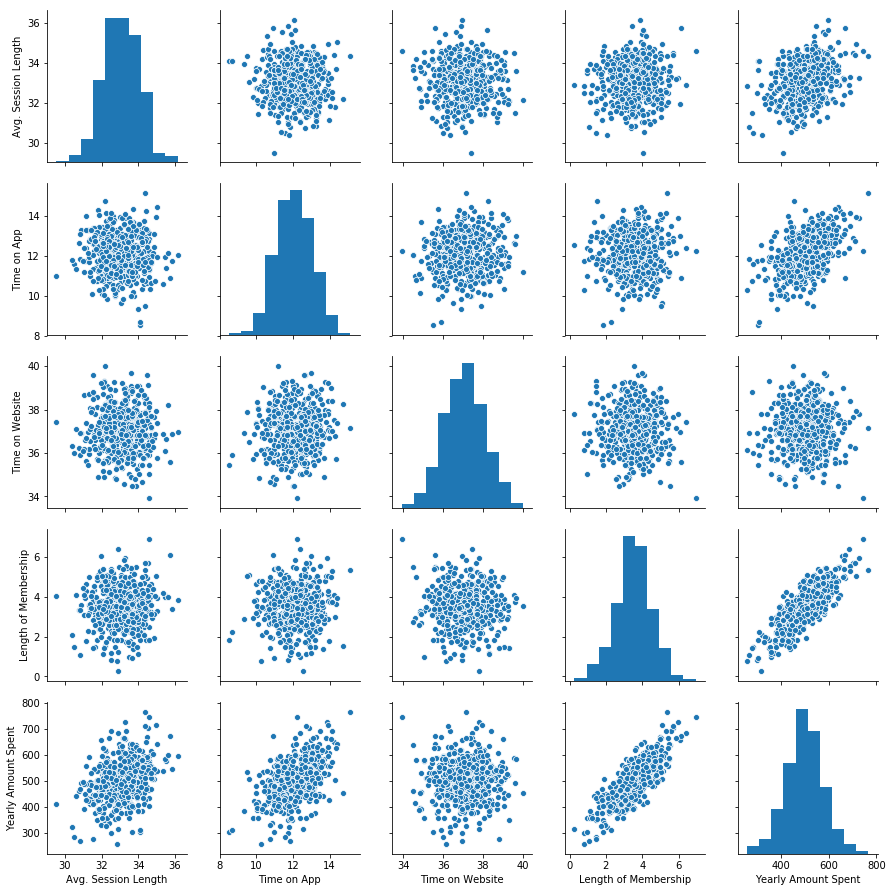

In [35]:
sns.pairplot(Ecom)


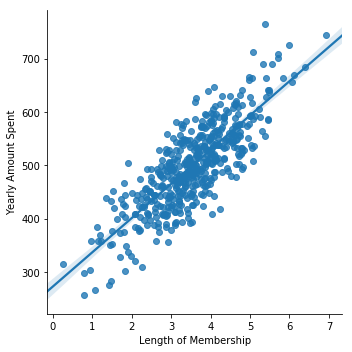

In [39]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=Ecom)


In [40]:
lm = LinearRegression()


In [44]:
# assign x and y
x = Ecom[['Avg. Session Length', 'Time on App',
'Time on Website', 'Length of Membership']]

y = Ecom['Yearly Amount Spent']


In [45]:
# data split using train_test_split func
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=101)


In [46]:
# model fit
lm.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [47]:
print(lm.intercept_)


-1045.115216824573


In [48]:
lm.coef_


array([25.69154034, 37.89259966,  0.56058149, 61.64859402])

In [49]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df 


,Coefficient
Avg. Session Length,25.691540
Time on App,37.892600
Time on Website,0.560581
Length of Membership,61.648594


In [50]:
# Prediction
predictions = lm.predict(x_test)


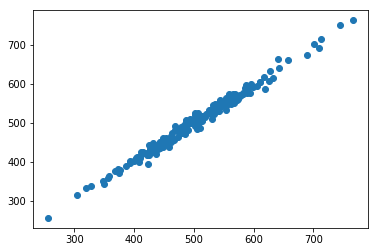

In [54]:
# scatter plot of predictions and actual values
plt.scatter(y_test,predictions)


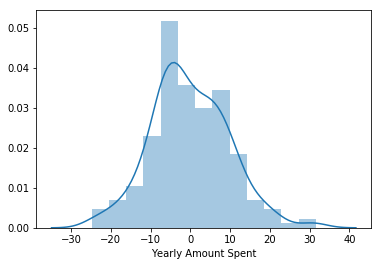

In [59]:
sns.distplot((y_test-predictions)) # normal distribution indicates right choice of data


In [60]:
# metrics evaluation
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MAE: 7.74267128583871
MSE: 93.83297800820048
RMSE: 9.686742383701576
